# Primera red convolucional para MNIST: LeNet

Como en la anterior práctica, primero importamos el conjunto de MNIST y lo normalizamos, pero sin convertir las imágenes en vectores unidimensionales 

In [2]:
from tensorflow import keras
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('training set', x_train.shape)
print('test set', x_test.shape)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize [0..255]-->[0..1]
x_train /= 255
x_test /= 255

# convert class vectors to binary class matrices
num_classes=10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

training set (60000, 28, 28)
test set (10000, 28, 28)


#  LeNet

**LeNet (1998):** $\;$ CNN de Yann LeCun para MNIST

<div align="center">
<table><tr>
<td style="border: none;"><img src="LeNet.png" width=300/></td>
<td style="border: none;"><img src="Figure_14.15.png" width=800/></td>
</tr></table>
</div>

**Ejemplo:** $\;$ LeNet con terminación temprana (paciencia 2)

In [3]:
from keras import Sequential
from keras.layers import Input,Conv2D, AveragePooling2D, Flatten, Dense

model = Sequential()

model.add(Input((28,28,1)))
model.add(Conv2D(filters=6, kernel_size=(5,5), activation='tanh', input_shape=(28,28,1)))
model.add(AveragePooling2D(pool_size=(2,2), strides=2))
model.add(Conv2D(filters=16, kernel_size=(5,5), activation='tanh'))
model.add(AveragePooling2D(pool_size=(2,2), strides=2))
model.add(Flatten())
model.add(Dense(units=120, activation='tanh'))
model.add(Dense(units=84, activation='tanh'))
model.add(Dense(units=10, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d (Average  (None, 12, 12, 6)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_1 (Avera  (None, 4, 4, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 120)               3

2023-11-20 23:21:46.105105: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-20 23:21:46.105385: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


El summary del modelo nos lista las diferentes capas del mismo así como su número de parámetros.

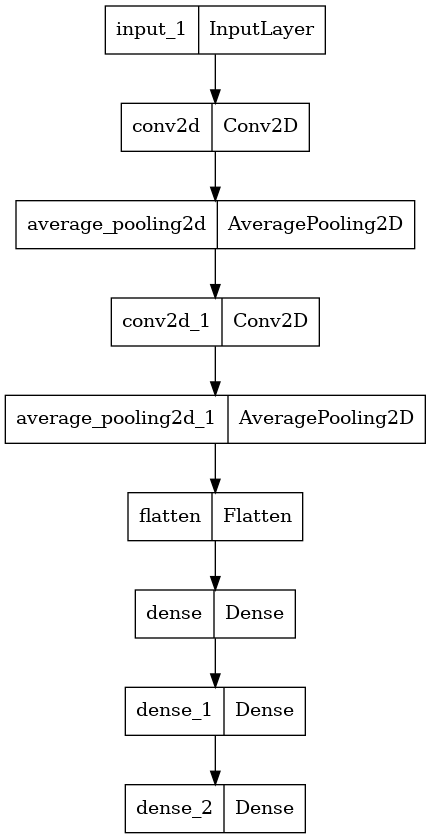

In [4]:
keras.utils.plot_model(model, to_file="model.png")

## Compilar el modelo 

Para terminar la definición de nuestro modelo debemos definir dos componentes muy importantes:

1. Función de pérdida. En nuestro caso al ser un problema de clasificación emplearemos la **categorical_crossentropy**
2. Optimizador. En nuestro caso y para empezar emplearemos un sencillo descenso por gradiente estocástico **SGD**

opcionalmente:

3. Definir una métrica asociada a la calidad del modelo. En nuestro caso sería la tasa de acierto **accuracy**


Una vez definidos pasamos a compilar el modelo:

In [6]:
from keras.optimizers import SGD

sgd=SGD(learning_rate=0.1)

# Compile Model
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])


## Entrenar el modelo

Una vez tenemos los datos cargados y normalizados, así como el modelo ya compilado, podemos realizar el entrenamiento mediante el método **fit**. Para ello previamente necesitamos definir el tamaño del batch así como el número de epochs.

Al mismo tiempo que entrenamos el modelo con los datos de entrenamiento vamos a ir evaluando dicho modelo sobre los datos de test. Además, vamos generando un **history** con la evolución del modelo para luego poder crear gráficas del mismo.

In [7]:
batch_size=32
epochs=25

H = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/25
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2231 - accuracy: 0.9344 - val_loss: 0.0940 - val_accuracy: 0.9688
Epoch 2/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0796 - accuracy: 0.9757 - val_loss: 0.0621 - val_accuracy: 0.9808
Epoch 3/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0560 - accuracy: 0.9825 - val_loss: 0.0595 - val_accuracy: 0.9804
Epoch 4/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0432 - accuracy: 0.9861 - val_loss: 0.0428 - val_accuracy: 0.9850
Epoch 5/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0357 - accuracy: 0.9888 - val_loss: 0.0419 - val_accuracy: 0.9853
Epoch 6/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0292 - accuracy: 0.9910 - val_loss: 0.0424 - val_accuracy: 0.9861
Epoch 7/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0248 - accuracy: 0.9926 - val_loss: 0.0388 - val_accuracy:

## Explorar el History

Realizar gráfica con resultados de accuracy

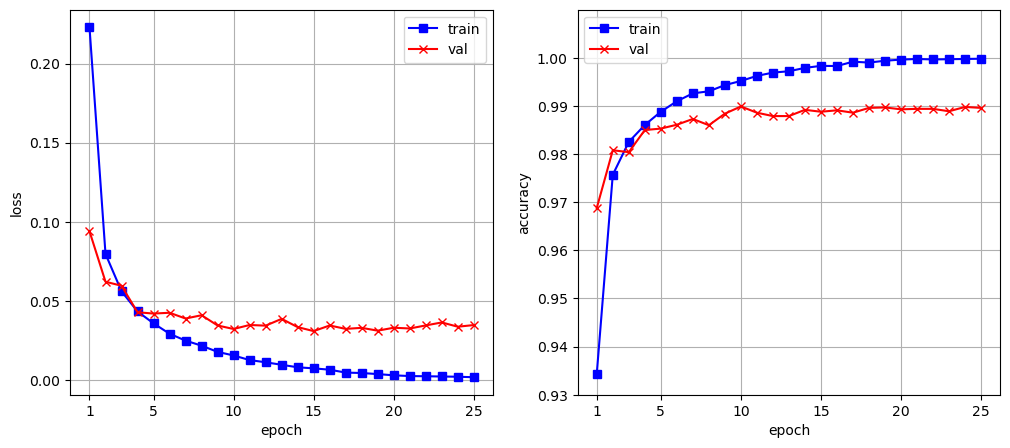

In [10]:
import numpy as np; import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
xx = np.arange(1, len(H.history['loss'])+1)
xticks = np.concatenate((np.array([1]), np.arange(5, len(H.history['loss'])+1, 5)))
ax = axes[0]; ax.grid(); ax.set_xlabel('epoch'); ax.set_ylabel('loss');
ax.set_xticks(xticks)
ax.plot(xx, H.history['loss'], color='b', marker='s', label='train')
ax.plot(xx, H.history['val_loss'], color='r', marker='x', label='val'); ax.legend()
ax = axes[1]; ax.grid(); ax.set_xlabel('epoch'); ax.set_ylabel('accuracy')
ax.set_xticks(xticks); ax.set_yticks(np.arange(.93, 1.01, .01)); ax.set_ylim([.93, 1.01])
ax.plot(xx, H.history['accuracy'], color='b', marker='s', label='train')
ax.plot(xx, H.history['val_accuracy'], color='r', marker='x', label='val'); ax.legend();

# Salvar y cargar el modelo

Normalmente necesitaremos salvar el modelo entrenado para emplearlo más tarde en producción (inferencia)

In [13]:
# guardar modelo
model.save("model.keras")

# cargar modelo
from keras.models import load_model
model = load_model("model.keras")

# evaluar modelo
score = model.evaluate(x_test, y_test, verbose=0)
print(f'Test loss: {score[0]*100:.2f}')
print(f'Test accuracy: {score[1]*100:.2f}')

Test loss: 3.46
Test accuracy: 98.96


### **Ejercicio** 

Explora diferentes parámetros de entrenamientos y anota el accuracy en test alcanzado

| Dense/Batch  | 16  | 32  |  64 | 128  |
|---|---|---|---|---|
|  256  |   |   |   |   |
|  512  |   |   |   |   |
|  1024 |   |   |   |   |